In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [156]:
data = pd.read_csv(r"C:\Users\Mahesh\OneDrive\Documents\Datasets\LensData.csv", index_col = 0)
data.head(15)

,Age of the Patient,Spectacle Prescription,Astigmatic,Tear Production Rate,Type of Lens to be fitted
Patient ID,,,,,
0,1,1,1,1,3
1,1,1,1,2,2
2,1,1,2,1,3
3,1,1,2,2,1
4,1,2,1,1,3
5,1,2,1,2,2
6,1,2,2,1,3
7,1,2,2,2,1
8,2,1,1,1,3


In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaler = StandardScaler()
scaler.fit(data.drop('Type of Lens to be fitted', axis=1))
scaled_features = scaler.transform(data.drop('Type of Lens to be fitted', axis=1))

In [159]:
data_std = pd.DataFrame(scaled_features, columns = data.columns[:-1])
data_std.head()

,Age of the Patient,Spectacle Prescription,Astigmatic,Tear Production Rate
0,-1.224745,-1.0,-1.0,-0.919866
1,-1.224745,-1.0,-1.0,1.087115
2,-1.224745,-1.0,1.0,-0.919866
3,-1.224745,-1.0,1.0,1.087115
4,-1.224745,1.0,-1.0,-0.919866


In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['Type of Lens to be fitted'], test_size = 0.3)

In [163]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [164]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [165]:
print(confusion_matrix(y_test, pred))

[[1 0 0]
 [0 1 1]
 [0 0 5]]


In [166]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.94      0.83      0.86         8
weighted avg       0.90      0.88      0.86         8



In [176]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
accuracy_rate = []

for i in range(1,15):  
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, data_std, data['Type of Lens to be fitted'], cv = 4)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'ACCURACY')

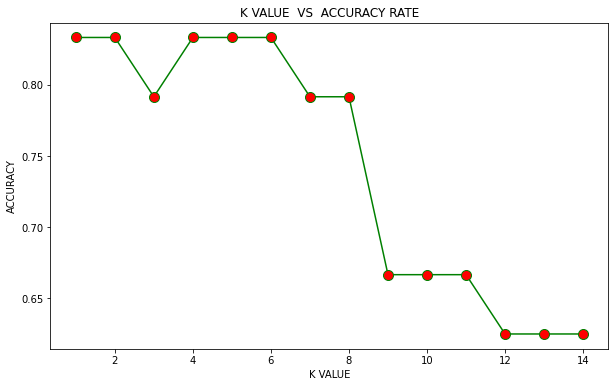

In [168]:
plt.figure(figsize=(10,6))

plt.plot(range(1,15), accuracy_rate, color='green', marker='o',markerfacecolor='red', markersize=10)
plt.title('K VALUE  VS  ACCURACY RATE')
plt.xlabel('K VALUE')
plt.ylabel('ACCURACY')

In [174]:
knn = KNeighborsClassifier(n_neighbors = 4)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K = 4 \n')
print("Confusion Matrix: \n", confusion_matrix(y_test,pred))
print('\n')
print("Classification Report: \n", classification_report(y_test,pred))

WITH K = 4 

Confusion Matrix: 
 [[1 0 0]
 [0 1 1]
 [0 0 5]]


Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.94      0.83      0.86         8
weighted avg       0.90      0.88      0.86         8

